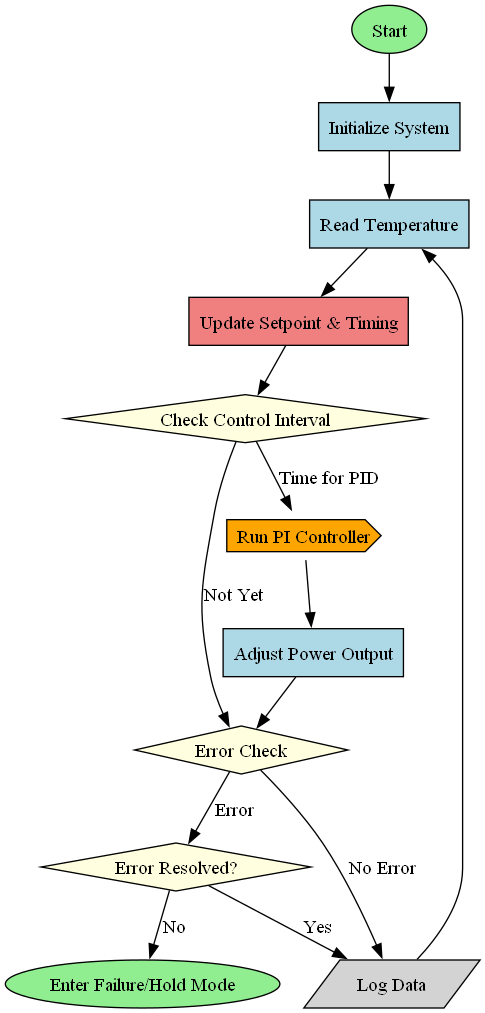

In [3]:
from graphviz import Digraph
from IPython.display import Image

# Define styles for different types of nodes
style_process = {'shape': 'box', 'style': 'filled', 'fillcolor': 'lightblue'}
style_decision = {'shape': 'diamond', 'style': 'filled', 'fillcolor': 'lightyellow'}
style_data = {'shape': 'parallelogram', 'style': 'filled', 'fillcolor': 'lightgrey'}
style_start_end = {'shape': 'ellipse', 'style': 'filled', 'fillcolor': 'lightgreen'}
style_custom = {'shape': 'cds', 'style': 'filled', 'fillcolor': 'orange'}
style_setpoint_update = {'shape': 'box', 'style': 'filled', 'fillcolor': 'lightcoral'}

# Create a new Digraph
g = Digraph('G', filename='process_control_flow.gv')
g.attr(rankdir='TB')

# Nodes
g.node('start', 'Start', **style_start_end)
g.node('init', 'Initialize System', **style_process)
g.node('read_temp', 'Read Temperature', **style_process)
g.node('update_setpoint', 'Update Setpoint & Timing', **style_setpoint_update)
g.node('check_interval', 'Check Control Interval', **style_decision)
g.node('run_PI', 'Run PI Controller', **style_custom)
g.node('adjust_power', 'Adjust Power Output', **style_process)
g.node('log_data', 'Log Data', **style_data)
g.node('error_check', 'Error Check', **style_decision)
g.node('handle_error', 'Error Resolved?', **style_decision)
g.node('failure_mode', 'Enter Failure/Hold Mode', **style_start_end)

# Edges
g.edge('start', 'init')
g.edge('init', 'read_temp')
g.edge('read_temp', 'update_setpoint')
g.edge('update_setpoint', 'check_interval')
g.edge('check_interval', 'run_PI', label='Time for PID')
g.edge('check_interval', 'error_check', label='Not Yet')
g.edge('run_PI', 'adjust_power')
g.edge('adjust_power', 'error_check')
g.edge('error_check', 'log_data', label='No Error')
g.edge('log_data', 'read_temp')
g.edge('error_check', 'handle_error', label='Error')
g.edge('handle_error', 'log_data', label='Yes')
g.edge('handle_error', 'failure_mode', label='No')

# Render and save the diagram
g.format = 'png'
img_path = g.render()

# Display the image
Image(filename=img_path)
